In [5]:
# gensim이 설치되어 있지 않다면... 아래 주석을 해제해주세요
#!pip install gensim

In [1]:
import config
from dataloader.loader import Loader
import pandas as pd
from gensim.models import word2vec
import nltk


In [3]:
# movie_reviews_unsup.csv 파일이 없을 경우 아래 주석을 해제하여면 생성할 수 있다.
unsupervised = Loader.load_imdb_unsup()
#unsupervised = pd.read_csv(config.IMDB_DATA_CSV + '/movie_reviews_unsup.csv', encoding='ISO-8859-1')

In [4]:
unsupervised.head()



,review
20604,I wanted to see this movie because I had read ...
42616,This is the cheap mans phantom of the opera.Di...
20985,Not only is monk the most hilarious mystery te...
31146,May I be so bold as to put one of the most ann...
38628,Most of the reviews I've read of this film use...


In [5]:
#train_df = pd.read_csv(config.IMDB_DATA_CSV + '/movie_reviews_train.csv', encoding='ISO-8859-1')
train_df = Loader.load_imdb_data('train')
#test_df = pd.read_csv(config.IMDB_DATA_CSV + '/movie_reviews_test.csv', encoding='ISO-8859-1')
test_df = Loader.load_imdb_data('test')

In [6]:
corpus = unsupervised['review'].tolist() + train_df['review'].tolist() + test_df['review'].tolist()

In [7]:
# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document.lower()) for document in corpus]

In [8]:
# Set values for various parameters
feature_size = 50    # Word vector dimensionality  
window_context = 10          # Context window size                                                                                    
min_word_count = 5   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

In [9]:
w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=1000)


In [10]:
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['good','superior','violent', 'romantic', 'nasty', 'unfortunate', 
                                      'predictable', 'hilarious', 'fascinating', 'boring','confused', 'sensitive',
                                     'imaginative','senseless', 'bland','disappointing']}


In [41]:
similar_words

{'bland': ['dull', 'lifeless', 'forgettable', 'uninspired', 'unconvincing'],
 'boring': ['dull', 'pointless', 'tedious', 'predictable', 'uninteresting'],
 'confused': ['irritated', 'puzzled', 'disturbed', 'frustrated', 'annoyed'],
 'disappointing': ['unsatisfying',
  'disappointed',
  'enjoyable',
  'surprising',
  'satisfying'],
 'fascinating': ['compelling',
  'enthralling',
  'captivating',
  'unique',
  'vivid'],
 'good': ['decent', 'great', 'nice', 'bad', 'fine'],
 'hilarious': ['funny', 'hysterical', 'priceless', 'comical', 'humorous'],
 'imaginative': ['inventive',
  'innovative',
  'ingenious',
  'intricate',
  'creative'],
 'nasty': ['sadistic', 'sleazy', 'gory', 'icky', 'vicious'],
 'predictable': ['clichéd', 'formulaic', 'contrived', 'implausible', 'dull'],
 'romantic': ['romance',
  'screwball',
  'bittersweet',
  'sentimental',
  'delightful'],
 'senseless': ['pointless',
  'meaningless',
  'disgusting',
  'sickening',
  'boring'],
 'sensitive': ['sincere', 'passionate', '

In [12]:
w2v_model.wv.save_word2vec_format(fname = 'imdb_word2vec.txt')
file = './imdb_word2vec.txt'
from gensim.models import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format(file, binary=False)

In [13]:
similar_words = {search_term: [item[0] for item in word_vectors.wv.most_similar([search_term], topn=5)]
                  for search_term in ['good','superior','violent', 'romantic', 'nasty', 'unfortunate', 
                                      'predictable', 'hilarious', 'fascinating', 'boring','confused', 'sensitive',
                                     'imaginative','senseless', 'bland','disappointing']}
pd.DataFrame(similar_words).transpose()

/home/dyanos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


,0,1,2,3,4
good,decent,nice,great,bad,fine
superior,inferior,weaker,maligned,lauded,truer
violent,brutal,graphic,gruesome,sadistic,disturbing
romantic,romance,screwball,sappy,lighthearted,sentimental
nasty,gory,sadistic,sleazy,icky,bloody
unfortunate,unacceptable,important,disastrous,unaware,probable
predictable,clichéd,implausible,formulaic,contrived,dull
hilarious,funny,hysterical,priceless,comical,humorous
fascinating,enthralling,compelling,captivating,unique,remarkable
boring,dull,pointless,tedious,predictable,unoriginal


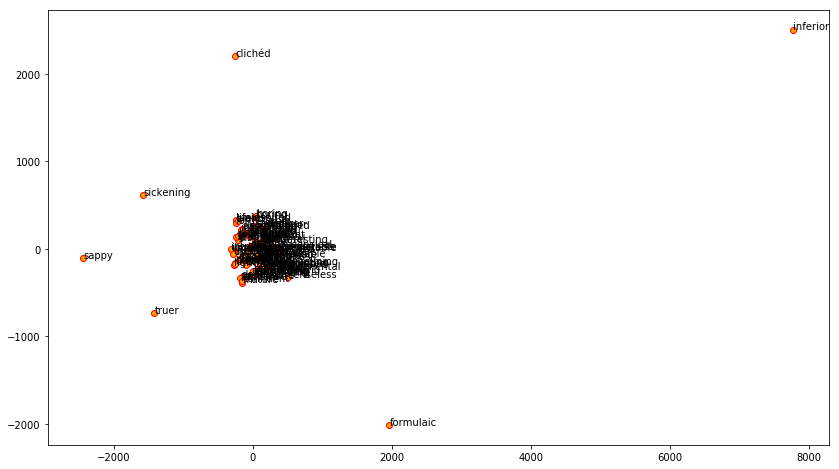

In [14]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline
words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')